# 자전거 파일 분석 

서울특별시 공공자전거 대여이력 정보 2019년 6월

서울특별시 공공자전거 대여정보_201906_1.csv

서울특별시 공공자전거 대여정보_201906_2.csv

서울특별시 공공자전거 대여정보_201906_3.csv

# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 나눔고디 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'

## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [ ]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False  

# 1. 데이터 수집 및 라이브러리 임포트

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

# 2. 데이터 가공

## 2-1. 분석할 데이터프레임 만들기

In [ ]:
#  2019년 6월 3개로 나누어진 파일들을 읽어 들이고 연결한다. 
 
bike_1 = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EB%8C%80%EC%97%AC%EC%A0%95%EB%B3%B4_201906_1.csv?raw=true', \
                      encoding = 'cp949', parse_dates=['대여일시','반납일시'])

bike_2 = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EB%8C%80%EC%97%AC%EC%A0%95%EB%B3%B4_201906_2.csv?raw=true', \
                      encoding = 'cp949', parse_dates=['대여일시','반납일시'])

bike_3 = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EB%8C%80%EC%97%AC%EC%A0%95%EB%B3%B4_201906_3.csv?raw=true', \
                      encoding = 'cp949', parse_dates=['대여일시','반납일시'])

bike_ride = pd.concat([bike_1, bike_2, bike_3], axis = 'index', ignore_index = True)

bike_ride.tail()

## 2-2. 데이터프레임 관찰하기

In [ ]:
# bike_ride 의 정보를 알려주는 명령어는 ?

bike_ride.info()

In [ ]:
# bike_ride 데이터프레임의 요약통계 알아보기
# 이용시간은 평균이 27분, 이용거리는 약 4km

bike_ride.describe()

In [ ]:
# 데이터타입이 object와 np.datetime64인 경우의 요약통계

bike_ride.describe(include = ['object', 'datetime64'])

분석결과 : 대여소는 1543 개가 있고,   자전거는 19029 대가 있다. 대여 대여소명과 반납대여소명에서 가장 빈도가 많은 것은 뚝섬유원지역 1번출구 앞이다. 

In [ ]:
# 누락값 조사

bike_ride.isnull().sum()

## 2-3. 분석주제에 맞는 새로운 컬럼 추가하기

In [ ]:
# bike_ride에 새로운 컬럼인 '요일'을 추가한다.
요일 = ['월','화','수','목','금','토','일']
bike_ride['요일'] = bike_ride['대여일시'].dt.dayofweek.apply(lambda x: 요일[x])

# 주중/주말공휴일 구분
bike_ride['주말구분'] = bike_ride['요일'].apply(\
                                lambda x: '평일' if x not in (['토', '일']) else '주말')

# 일자 컬럼 추가
bike_ride['일자'] = bike_ride['대여일시'].dt.day

# 시간대 컬럼 추가
bike_ride['대여시간대'] =bike_ride['대여일시'].dt.hour
bike_ride['반납시간대'] =  bike_ride['반납일시'].dt.hour

bike_ride.head()

# 3. 데이터 모델링 및 데이터 시각화

## 3-1. 시간 개념에 따른 이용패턴 분석

### 3-1-1. 일자별 따릉이 이용건수

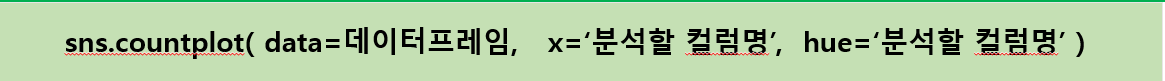

In [ ]:
#  3-1-1. 다같이 직접 실습합니다.
#  seaborn 라이브러리에 속하는 sns.countplot()를 사용하여 일자별로 따릉이 이용건수를 시각화한다.

plt.figure(figsize=(15, 4))
sns.****(x='일자', data=bike_ride);

분석결과 >

6일은 현충일로 공유일임에도 18일과 같이 비가 와서 따릉이 이용률이 저조하였다. 따릉이 이용이 날씨에 영향을 받는다. 날씨 외에 요일별 영향은 없어 보인다.

### 3-1-2. 요일별 따릉이 이용건수

In [ ]:
#  3-1-2. 다같이 직접 실습합니다.
#  seaborn 라이브러리에 속하는 sns.countplot()를 사용하여 요일별로 따릉이 이용건수를 시각화한다.

sns.countplot(x=****, data=bike_ride, order=['월','화','수','목','금','토','일']);

분석결과 >

주말이 평일보다 이용량이많고 평일은 목요일이 좀 이용량이 적다.

### 3-1-3. 대여시간대별 따릉이 이용건수

In [ ]:
#  3-1-3.
#  seaborn 라이브러리에 속하는 sns.countplot()를 사용하여 대여시간대별로 따릉이 이용건수를 시각화한다.


plt.figure(figsize=(15, 4))
sns.countplot(x='대여시간대', data=bike_ride);

분석결과 >

출퇴근시간인 오전 8시를 중심으로 이용건수가 많고 퇴근시간인 오후 18시를 기준으로 이용건수가 많다.

### 3-1-4. 대여시간대 x 요일 따릉이 이용건수

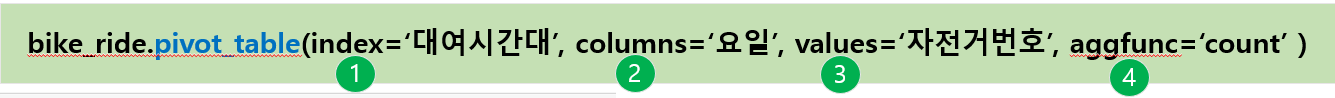

In [ ]:
#  3-1-4.
#  1단계 > pivot_table를 사용하여 모델링한다.

hourly_dayofweek_ride = bike_ride.pivot_table(\
                      index = '대여시간대', \
                      columns = '요일', \
                      values = '자전거번호', \
                      aggfunc = 'count'
                     )

hourly_dayofweek_ride.head()

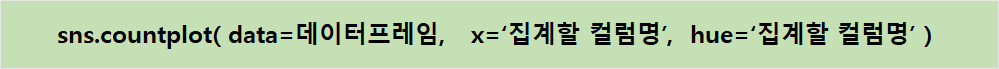

In [ ]:
#  3-1-5.
#  2단계 > sns.countplot()을 사용하여 시각화한다.

plt.figure(figsize=(15, 4))
sns.countplot(data=bike_ride, x='대여시간대', hue='요일');

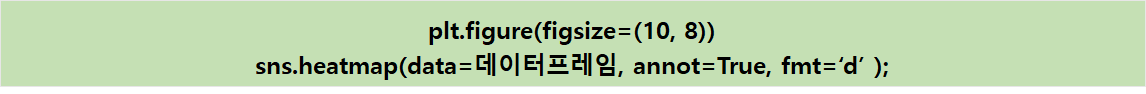

In [ ]:
#  3-1-6. 다같이 직접 실습합니다.
#  3단계 > sns.heatmap으로 표현한다. 흐린색일수록 이용건수가 많다.

plt.figure(figsize=(10, 8))
sns.****(data=hourly_dayofweek_ride, annot=True, fmt='d');

분석결과 >

저녁시간이 따릉이 이용건수가 많고 특히 6시에 대여건수가 가장 많다.  오전에는 평일 8시에 대여건수가 많은 것으로 보아 출퇴근용으로 사용하는 것으로 보인다. 토요일에는 오전 10시부터 오후 23시까지도 이용건수가 많다. 

## 3-2. 장소 특징에 따른 이용패턴

### 3-2-1. 대여소정보 수집 및 필요한 컬럼 만들기

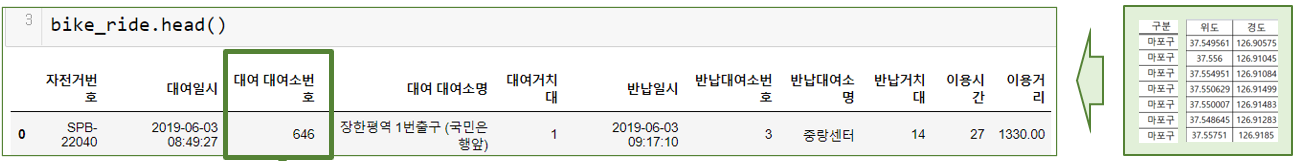

In [ ]:
#  3-2-1.
#  지도 시각화를 위해서 필요한 대여구, 대여점위도, 대여점경도 데이터를 가지는 컬럼을 bikd_ride 데이터프레임에 추가한다.

#  1단계 : 대여소들이 위치한 행정구역상 구를 알아내기 위해서 2019년 공공자전거 이용정보 파일을 읽어들인다.
bike_shop = pd.read_excel('https://github.com/sagelab4data/first_da_2021_1/blob/main/%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EB%8C%80%EC%97%AC%EC%86%8C%20%EC%A0%95%EB%B3%B4_201905.xlsx?raw=true')

#  2단계 : bike_gu 데이터프레임에서 필요한 컬럼만 추출한다.
bike_gu = bike_shop[['구분', '대여소번호', '대여소명', '위도', '경도']]

#  3단계 : 대여 대여소번호를 사용하여 두개의 데이터프레임을 병합한다.
bike_ride = pd.merge(bike_ride, bike_gu, left_on='대여 대여소번호', right_on='대여소번호')

#  4단계 : bike_ride 데이터프레임내의 중복되는 컬럼을 삭제한다.
bike_ride.drop(['대여소번호', '대여소명'], axis='columns', inplace=True)

#  5단계 : bike_ride 데이터프레임내의 컬럼명을 명확하게 변경한다.
bike_ride.rename(columns={'구분' : '대여구',\
                          '위도' : '대여점위도', \
                          '경도' : '대여점경도'}, \
                 inplace=True)

bike_ride.head()


### 3-2-2. 대여구별 이용시간 분석

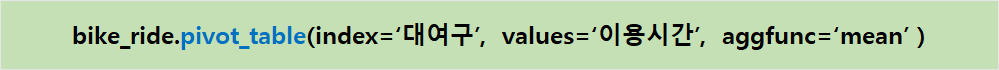

In [ ]:
#  3-2-2. 다같이 직접 실습합니다.
#  대여구별 이용시간을 분석하여 지도 시각화하는 것을 단계적으로 수행해본다.
#  1단계 : 데이터 모델링 > 대여구별 이용시간을 평균한다. 이것이 구별이용시간평균 이다.


구별이용시간평균 = bike_ride.pivot_table(\
        index = ****, \
        values = '이용시간', \
        aggfunc = 'mean')

구별이용시간평균.head(3)

In [ ]:
#  3-2-3. 
#  대여구별 이용시간을 분석하여 지도 시각화하는 것을 단계적으로 수행해본다.
#  2단계 : 지도 시각화 명령어에 입력하기 위해서 reset_index를 한다.


구별이용시간평균.reset_index(inplace=True)
구별이용시간평균.head(3)

In [ ]:
#  3-2-4.
#  대여구별 이용시간을 분석하여 지도 시각화하는 것을 단계적으로 수행해본다.
#  3단계 : 깃허브에 있는 서율시지도 파일을 가져온다. 서울시지도는 json 파일형식이다.

import requests

req = requests.get('https://github.com/sagelab4data/first_da_2021_1/blob/main/seoul.json?raw=true' )
서울시지도 = req.json()

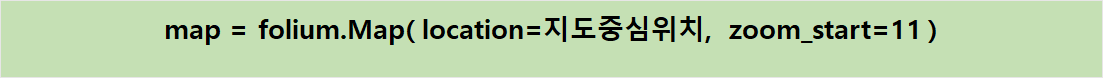

In [ ]:
#  3-2-5. 다같이 직접 실습합니다.
#  대여구별 이용시간을 분석하여 지도 시각화하는 것을 단계적으로 수행해본다.
#  4단계 : 서울시 중심의 위도와 경도 정보를 구하고 서울시 지도를 초기화한다.

#  지도 시각화를 위한 다양한 명령어를 가지는 folium 라이브러리를 임포트한다.
import folium

#  지도의 중심위치를 정한다.
lat = bike_ride['대여점위도'].mean()
lon = bike_ride['대여점경도'].mean()
center = [lat, lon]

#  위에서 구한 중심위치를 전달인자에 넣어서 지도를 초기화하여 변수 map에 할당한다.
map = folium.*** (location = center, zoom_start = 11)

map

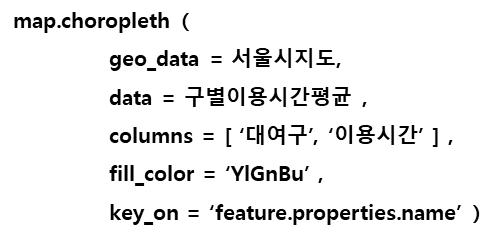

In [ ]:
#  3-2-6. 다같이 직접 실습합니다.
#  대여구별 이용시간을 분석하여 지도 시각화하는 것을 단계적으로 수행해본다.
#  5단계 : map.choropleth()의 다양한 전달인자에 데이터를 전달해서 지도 시각화를 완성한다.

map.****(
    geo_data = 서울시지도,
    data = 구별이용시간평균,  
    columns = ['대여구', '이용시간'],
    fill_color = 'YlGnBu',
    key_on = 'feature.properties.name')
   
map

## 3-3. 시간적 개념  x 장소 특징 이용패턴

### 주말에 인기있는 대여소 TOP 50

In [ ]:
#  3-3-1.
#  대여 대여소 x 주말구분 의 이용건수를 pivot_table()를 사용하여 모델링한다.

rent_bike = bike_ride.pivot_table( \
            index = ['대여 대여소명', '대여점위도', '대여점경도'], \
            columns = '주말구분', \
            values = '자전거번호', \
            aggfunc = 'count')
rent_bike.head()

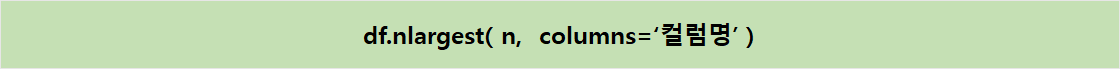

In [ ]:
#  3-3-2.
# 주말대여점50 을 구한다.

#  1단계 : rent_bike 데이터프레임의 '주말'컬럼에서 상위 50개를 선택한다.
rent_bike.nlargest(50, '주말')

#  2단계 : rent_bike 데이터프레임에서 '주말'컬럼만 선택한다.
rent_bike.nlargest(50, '주말')['주말']

#  3단계 : reset_index()를 해서 folium 라이브러리에 있는 지도 시각화 명령어를 쓰기 편하게 정돈된 데이터를 만든다.
주말대여점50 = rent_bike.nlargest(50, '주말')['주말'].reset_index()

주말대여점50.head(3)

In [ ]:
#  3-3-3. 
#  지도 시각화를 위해 지도를 초기화하고 map1 변수에 할당한다.

lat = 주말대여점50['대여점위도'].mean()
lon = 주말대여점50['대여점경도'].mean()
center = [lat, lon]
map1 = folium.Map(location = center, zoom_start = 12)

map1

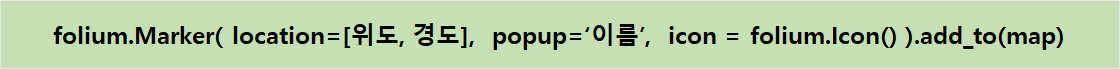

In [ ]:
#  3-3-4. 다같이 실습합니다.
#  for 문을 사용하여 50개의 인기있는 주말대여점을 차례로 지도에 추가한다.

for i in 주말대여점50.index:
    
    sub_lat = 주말대여점50.loc[i, '대여점위도']
    sub_lon = 주말대여점50.loc[i, '대여점경도']
    대여점위치 = [sub_lat, sub_lon]
    대여점명 = 주말대여점50.loc[i,'대여 대여소명']
    
    #지도에 데이터 찍어서 보여주기
    folium.**** (\
        location = 대여점위치, \
        popup = 대여점명).add_to(map1)

map1